
# **<u>Kinematics of The Stewart Platform<u>**



### Table of Contents:
><font size="+0.5">I.   Introduction: What is the Stewart Platform? <br>
II.   Part 1: Encoding A Basic Stewart Platform <br>
III.  Parts 2 & 3: Graphical Representations <br>
IV.   Part 4: Applying an Equation-Solving Method on the Stewart Platform <br>
V.    Parts 5, 6, & 7: Using the Equation Solver with Altered Input Conditions <br>
VI.   References and Helpful Links <br> </font>

### Introduction: What is the Stewart Platform?
><font size="+0.5">The Stewart Platform is a triagular platform with six variable struts; three framing and three supporting. The struts are variable as they have prismatic joints, which allows movement by altering the length of the strut. The system has 6 degrees of freedom, and can be controlled robotically. Below is a schematic of a simplified, two-dimensional, Stewart Platform, on which this project will be based. </font>


In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Encoding A Basic Stewart Platform
><font size="+0.5">The first part of this project encodes the mathematical strucutre of the Stewart Platform, when solving for x and y, the coordinates of the triangular platform's first vertex. <br>The code is then tested using one set initial conditions, on the  interval [-<span>&pi;</span>:<span>&pi;</span>]. </font>

In [ ]:
def stewartFunction(theta):
    L1=2
    L2=math.sqrt(2)
    L3=L2
    p1=math.sqrt(5)
    p2=p1
    p3=p1
    gamma= math.pi /2
    x1=4
    x2=0
    y1=0
    y2=4
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
    
    
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    if D!=0:
        x=N1/D
        y=N2/D
    else: 
        return "D=0,Hence x,y couldn`t be found"
  
    fTheta=N1**2 + N2**2 - (p1**2)*(D**2)
    
    return fTheta, x, y 


In [ ]:
def drawFig(frame):
    pt = frame.plot(x="θ", y="f(θ)",figsize=(10,8)) 
    pt.set_ylabel('f(θ)',fontsize=14)
    pt.set_xlabel('θ',fontsize=14)
    pt.get_legend().remove()
    pt.grid()
    pt.axline((-3.14, 0),(3.14,0),color='r') 
    return pt

In [ ]:
d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df=pd.DataFrame(data=d)

listloop=[-math.pi, -math.pi/2,  -math.pi/3, -math.pi/4, -math.pi/6, math.pi/6, math.pi/4, math.pi/3, math.pi /2, math.pi]

for i in range(len(listloop)):
    result = stewartFunction(listloop[i])
    df.loc[i]=[listloop[i],result[1],result[2],result[0]]

df 

,θ,x,y,f(θ)
0,-3.141593,2.707107,2.707107,3.319229e+04
1,-1.570796,1.292893,2.707107,5.184000e+03
2,-1.047198,1.034074,2.258819,7.139717e+02
3,-0.785398,1.000000,2.000000,-4.547474e-13
4,-0.523599,1.034074,1.741181,-2.419099e+02
5,0.523599,1.741181,1.034074,-2.419099e+02
6,0.785398,2.000000,1.000000,-4.547474e-13
7,1.047198,2.258819,1.034074,7.139717e+02
8,1.570796,2.707107,1.292893,5.184000e+03
9,3.141593,2.707107,2.707107,3.319229e+04


### Parts 2 & 3: Graphical Representations

> <font size="+0.5">In parts 2 & 3, we will code a program to graphically represent the Stewart problem. First, the function defined and tested in Part 1 will be graphed as f(<span>&#952;</span>) over <span>&#952;</span> . 
<br>We will then produce a graphical image of the position of the Stewart platform at the conditions specified in Part 1. </font>


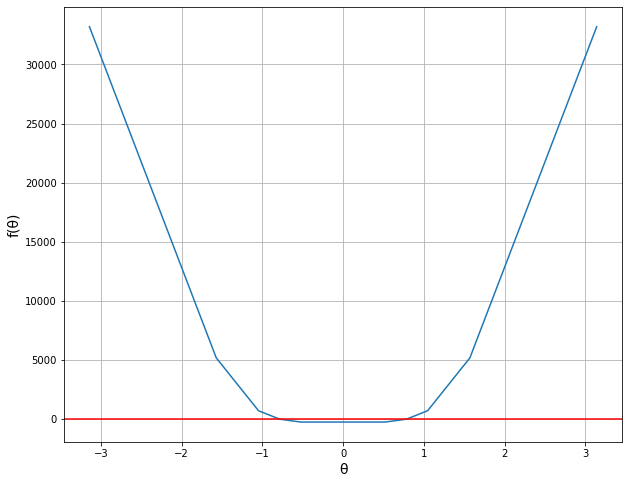

In [ ]:
x=drawFig(df)

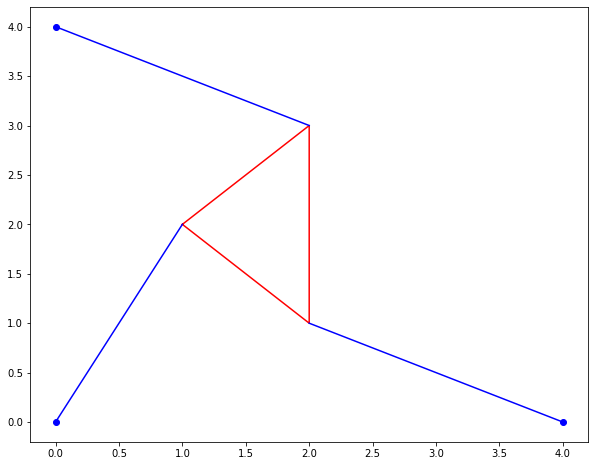

In [ ]:
theta = -math.pi/4
gamma = math.pi/2
L3= L2 = math.sqrt(2)
x=1
y=2
u1=x
v1=y
u2=u1+L3*math.cos(theta)
v2=v1+L3*math.sin(theta);
u3=u1+L2*math.cos(theta+gamma)
v3=v1+L2*math.sin(theta+gamma);
plt.figure(figsize=(10,8))
plt.plot([u1, u2, u3, u1],[v1,v2,v3,v1],'r') 

x0 = 0 
y0 = 0
x1 = 4 
y1 = 0
x2 = 0
y2 = 4

plt.plot([x0,x1,x2], [y0,y1,y2],'bo')

plt.plot([x0, u1],[y0, v1],'b')
plt.plot([x1,u2],[y1,v2],'b')
plt.plot([x2, u3],[y2,v3],'b')

plt.show() 

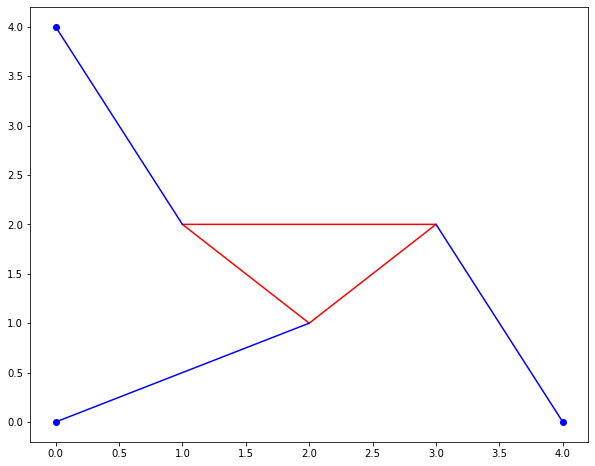

In [ ]:
x=2
y=1
u1=x
v1=y
u2=1;
v2=2;
u3=3;
v3=2;
plt.figure(figsize=(10,8))
plt.plot([u1, u2, u3, u1],[v1,v2,v3,v1],'r') 

plt.plot([x0,x1,x2], [y0,y1,y2],'bo')

plt.plot([x0, u1],[y0, v1],'b')
plt.plot([x1,u3],[y1,v3],'b')
plt.plot([x2, u2],[y2,v2],'b')

plt.show() 

### Part 4: Applying an Equation-Solving Method on the Stewart Platform
> <font size="+0.5"> Using a new set of initial conditions, we will solve for the x and y coordinates, as well as <span>&#952;</span>, the angle, of the Stewart Platform. Instead of simply evaluating over an interval of <span>&#952;</span> and finding multiple possible values, we will employ the **bisection** solving method. We will then graph the four possible positions using the solution provided by our bisection solver.
</font>

In [ ]:
def stewartFunction4(theta):
    L1=3
    L2=3*math.sqrt(2)
    L3=L1
    p1=5
    p2=5
    p3=3
    gamma= math.pi /4
    x1=5
    x2=0
    y2=6
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
   
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    
    
    if D!=0:
        x=N1/D
        y=N2/D
    else: 
        return "D=0,Hence x,y couldn`t be found"
    fTheta=N1**2 + N2**2 - (p1**2)*(D**2)

    p_test = math.sqrt((x + A2)**2+(y+B2)**2)
    return fTheta, x, y

In [ ]:
tol=1e-12 

def bisectionMethod(f, a,b,tol,nmax): 
    for i in range(nmax):
        c=(a+b)/2
        if f(c)[0]==0.0 or abs(f(c)[0])<=tol:
            out=c
            break
        if f(a)[0]*f(c)[0]<0:
            b=c
        else: a=c
    return i+1,c

In [ ]:
d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df4=pd.DataFrame(data=d)

listloop=[-math.pi, -math.pi/2,  -math.pi/3, -math.pi/4, -math.pi/6, 0, math.pi/6, math.pi/4, math.pi/3, math.pi /2,math.pi/1.6,math.pi ]
for i in range(len(listloop)):
    result = stewartFunction4(listloop[i])
    df4.loc[i]=[listloop[i],result[1],result[2],result[0]]
df4

,θ,x,y,f(θ)
0,-3.141593,4.000000,4.555556,243712.000000
1,-1.570796,-0.111111,5.851852,107968.000000
2,-1.047198,-1.144486,5.198347,16790.851794
3,-0.785398,-1.365930,4.867475,1540.787899
4,-0.523599,-1.281305,4.724810,-1328.901648
5,0.000000,1.000000,6.666667,2944.000000
6,0.523599,7.956870,10.068118,4767.619538
7,0.785398,6.223066,5.430964,4424.578550
8,1.047198,4.744486,2.734986,1805.148206
9,1.570796,4.250000,1.416667,-11360.000000


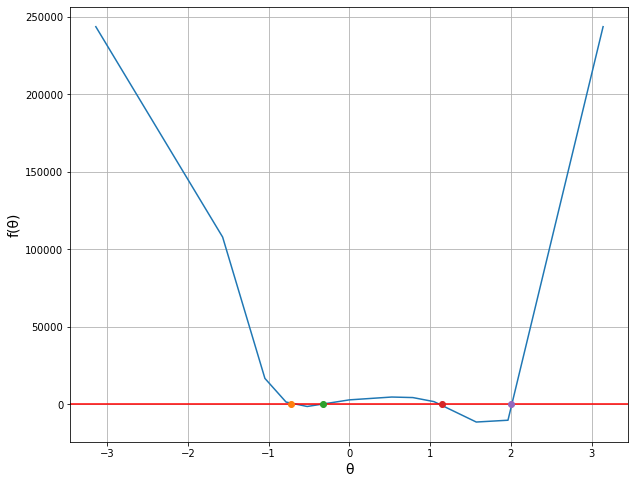

In [ ]:
x=drawFig(df4)
pose1 = bisectionMethod(stewartFunction4,-1,-0.5,tol,nmax=100)[1] 
pose2 = bisectionMethod(stewartFunction4,-0.5,0,tol,nmax=100)[1] 
pose3 = bisectionMethod(stewartFunction4,1,1.5,tol,nmax=100)[1] 
pose4 = bisectionMethod(stewartFunction4,1.5,2,tol,nmax=100)[1] 
x.plot(pose1,0,'o')
x.plot(pose2,0,'o')
x.plot(pose3,0,'o')
x.plot(pose4,0,'o')
plt.show()

In [ ]:
def drawPoses(func,theta): 
    
    [ftheta, x, y] = func(theta); 
    u1=x
    v1=y
    L3= L2 = 3
    gamma = math.pi/4
    u2=u1+L3*math.cos(theta)
    v2=v1+L3*math.sin(theta)
    u3=x+L2*math.cos(theta+gamma)
    v3=y+L2*math.sin(theta+gamma)
    
    x0 = 0 
    y0 = 0
    x1 = 5
    y1 = 0
    x2 = 0
    y2 = 6
    
    print("x= ",x,"y= ",y)
    
    plt.figure(figsize=(10,8))
    plt.plot([u1, u2, u3, u1],[v1,v2,v3,v1],'r') 
    
    plt.plot([x0,x1,x2], [y0,y1,y2],'bo')
    
    plt.plot([x0, u1],[y0, v1],'b')
    plt.plot([x1, u2],[y1,v2],'b')
    plt.plot([x2,u3],[y2,v3],'b')
    
    plt.show()

theta =  -0.7208492044603905
x=  -1.3783796305976983 y=  4.806253176222966


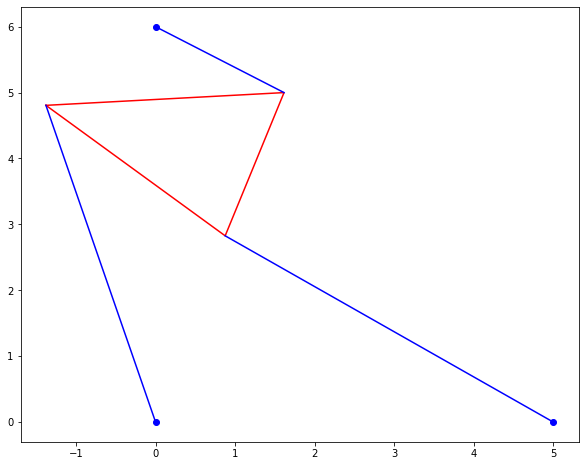

In [ ]:
print("theta = ", pose1)
drawPoses(stewartFunction4,pose1)

theta =  -0.33100518428386966
x=  -0.9147087168343389 y=  4.915618777259612


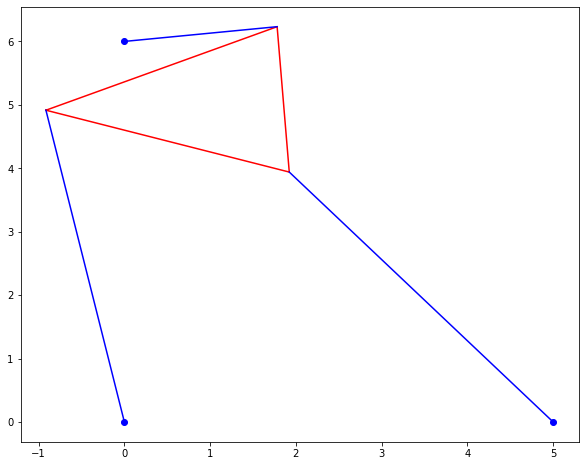

In [ ]:
print("theta = ", pose2)
drawPoses(stewartFunction4,pose2)

theta =  1.1436855178213738
x=  4.48175006539903 y=  2.2167355167668954


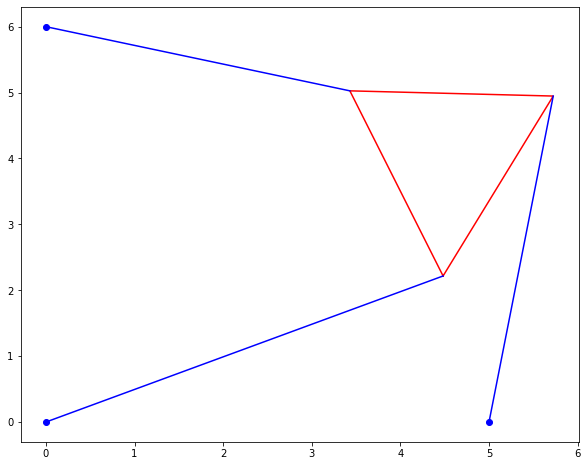

In [ ]:
print("theta = ",pose3)
drawPoses(stewartFunction4,pose3)

theta =  2.0
x=  4.510456707437348 y=  1.8113317358206675


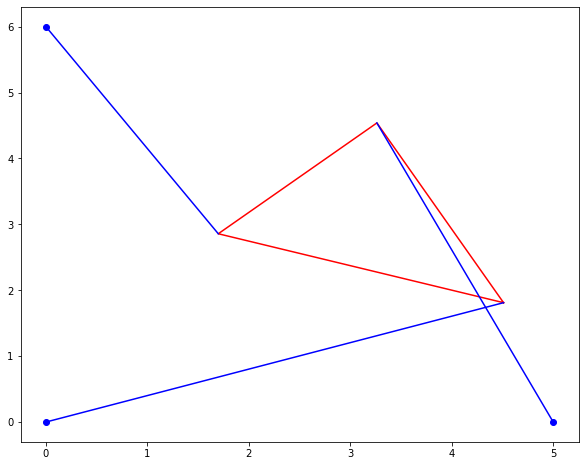

In [ ]:
print("theta = ",pose4)
drawPoses(stewartFunction4,pose4)

<font size="+0.5">Here we execute the same problem, but using the Newton Method solver. The Newton solver is quadratically convergent, so it can often be more efficient. However, it requires a well-conditioned problem to produce a solution.<font/>

In [ ]:
def stewartFunctionDiff(theta):
    L1=3
    L2=3*math.sqrt(2)
    L3=L1
    p1=5
    p2=3.6875
    p3=3
    gamma= math.pi /4
    x1=5
    x2=0
    y2=6
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
   
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    
    B3diff=L2*math.cos(theta+gamma)
    A2diff=-L3*math.sin(theta)
    B2diff=L3*math.cos(theta)
    A3diff=-L2*math.sin(theta+gamma)

    N1diff=B3diff*(p2**2 - p1**2 - A2**2 -B2**2)+(-2*A2*A2diff-2*B2*B2diff)*B3- B2diff*(p3**2 - p1**2 - A3**2 - B3**2)-(-2*A3*A3diff-2*B3*B3diff)*B2
    N2diff=(-1)*A3diff*(p2**2 - p1**2 - A2**2 -B2**2)+(-2*A2*A2diff-2*B2*B2diff)*(-1)*A3+A2diff*(p3**2 - p1**2 - A3**2 - B3**2)+(-2*A3*A3diff-2*B3*B3diff)*A2
    Ddiff=2*(A2*B3diff+A2diff*B3-B2*A3diff-A3*B2diff)
    
    if D!=0:
        xdiff=N1diff/Ddiff
        ydiff=N2diff/Ddiff
    else: 
        return "D=0,Hence x,y couldn`t be found"
    

    fThetaDiff=2*N1*N1diff + 2*N2*N2diff - (p1**2)*(2*D*Ddiff)

    return fThetaDiff, xdiff, ydiff

In [ ]:
def NewtonMethod(f,diffd,x_start,tol, j):
    max_iter=j
    i=0
    xi=x_start
    
    for i in range(0,max_iter):
        x_next=xi-(f(xi)[0]/diffd(xi)[0])
        if (x_next-xi)/xi<=tol :
            break    
        xi=x_next
    
    return x_next, i+1

<font size="+0.5">Now, a quick comparison of results between the bisection and newton methods:<font/>

In [ ]:
tolList = [1e-1, 1e-2, 1e-3, 1e-10, 1e-11, 1e-12]
d = {'Tolerance':[], 'Bisection Iterations': [], 'Bisection Value': [], 'Newton Iterations':[], 'Newton Value': []}
dfTest2=pd.DataFrame(data=d)
for i in range(len(tolList)):
    tol=tolList[i]
    b=list(bisectionMethod(stewartFunction4,1.5,2,tol,nmax=100))
    n=list(NewtonMethod(stewartFunction4,stewartFunctionDiff,2,tol,100))
    dfTest2.loc[i]=[tol,b[0],b[1],n[1],n[0]]
dfTest2

,Tolerance,Bisection Iterations,Bisection Value,Newton Iterations,Newton Value
0,1.000000e-01,100.0,2.0,1.0,2.082141
1,1.000000e-02,100.0,2.0,3.0,2.111770
2,1.000000e-03,100.0,2.0,5.0,2.115373
3,1.000000e-10,100.0,2.0,21.0,2.115909
4,1.000000e-11,100.0,2.0,23.0,2.115909
5,1.000000e-12,100.0,2.0,25.0,2.115909


In [ ]:
tolList = [1e-1, 1e-2, 1e-3, 1e-10, 1e-11, 1e-12]
d = {'Tolerance':[], 'Bisection Iterations': [], 'Bisection Value': [], 'Newton Iterations':[], 'Newton Value': []}
dfTest0=pd.DataFrame(data=d)
for i in range(len(tolList)):
    tol=tolList[i]
    b=list(bisectionMethod(stewartFunction4,-0.5,0,tol,nmax=100))
    n=list(NewtonMethod(stewartFunction4,stewartFunctionDiff,1e-50,tol,100))
    dfTest0.loc[i]=[tol,b[0],b[1],n[1],n[0]]
dfTest0

,Tolerance,Bisection Iterations,Bisection Value,Newton Iterations,Newton Value
0,1.000000e-01,15.0,-0.331009,3.0,0.133524
1,1.000000e-02,17.0,-0.331005,3.0,0.133524
2,1.000000e-03,17.0,-0.331005,3.0,0.133524
3,1.000000e-10,41.0,-0.331005,3.0,0.133524
4,1.000000e-11,48.0,-0.331005,3.0,0.133524
5,1.000000e-12,53.0,-0.331005,3.0,0.133524


<font size="+0.5"> While the Newton method may initially appear fast and able to produce higher tolerance results, it cannot handle all cases. When attempting to run the Newton solver at values close to 0, it cannot produce accurate results. Thus, for equations with roots near 0, such as this one, the Newton solver is not ideal.  <font/>

### Parts 5, 6, & 7: Using the Equation Solver with Altered Input Conditions
><font size="+0.5">Utilizing the solver coded in Part 4, we will now input other initial conditions, as well as solve for other variables in the problem, such as p2, the length of one of the strut arms. </font>

### Part 5

In [ ]:
def stewartFunction5(theta):
    L1=3
    L2=3*math.sqrt(2)
    L3=L1
    
    p1=5
    p2=7;
    p3=3
    gamma= math.pi /4
    x1=5
    x2=0
    y2=6
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
    
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    if D!=0:
        x=N1/D
        y=N2/D
    else: 
        return "D=0,Hence x,y couldn`t be found"
    fTheta=N1**2 + N2**2 - (p1**2)*(D**2)
    return fTheta, x, y

In [ ]:
d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df5=pd.DataFrame(data=d)

listloop=[ -math.pi,-math.pi/2,  -math.pi/3, -math.pi/4, -math.pi/5, -math.pi/6, -math.pi/8, 0, math.pi/8, math.pi/6, math.pi/5, math.pi/4, math.pi/3, math.pi /2,math.pi /1.5,math.pi /1.3, math.pi]

for i in range(len(listloop)):
    result = stewartFunction5(listloop[i])
    df5.loc[i]=[listloop[i],result[1],result[2],result[0]]
df5

,θ,x,y,f(θ)
0,-3.141593,2.500000,5.055556,141184.000000
1,-1.570796,-2.111111,5.185185,73984.000000
2,-1.047198,-3.544486,3.812707,10580.944580
3,-0.785398,-4.106482,2.929612,1230.865787
4,-0.628319,-4.392746,2.363140,-212.931989
5,-0.523599,-4.563630,1.980740,-321.100544
6,-0.392699,-4.754702,1.513001,-84.203356
7,0.000000,-5.000000,0.666667,64.000000
8,0.392699,-1.892698,4.042138,-156.071078
9,0.523599,0.143853,5.557270,201.517870


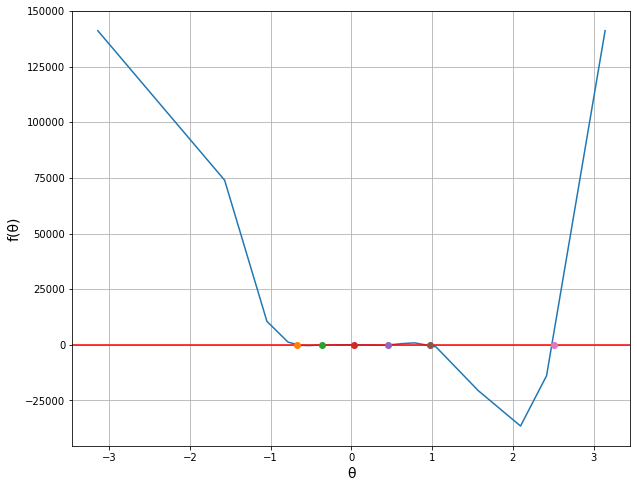

In [ ]:
x=drawFig(df5)
pose_1 = bisectionMethod(stewartFunction5,-1, -0.6,tol,nmax=100)[1] 
pose_2 = bisectionMethod(stewartFunction5,-0.5, -0.36,tol,nmax=100)[1] 
pose_3 = bisectionMethod(stewartFunction5,0, 0.4,tol,nmax=100)[1]
pose_4 = bisectionMethod(stewartFunction5,0.4, 0.5,tol,nmax=100)[1]
pose_5 = bisectionMethod(stewartFunction5,0.9, 1,tol,nmax=100)[1]
pose_6 = bisectionMethod(stewartFunction5,2,3,tol,nmax=100)[1]
x.plot(pose_1,0,'o')
x.plot(pose_2,0,'o')
x.plot(pose_3,0,'o')
x.plot(pose_4,0,'o')
x.plot(pose_5,0,'o')
x.plot(pose_6,0,'o')
plt.show()

<font size="+0.5">To get a closer look at these values, we zoom in on the graph. Since the sixth root can be seen properly in the original, we will see only five roots in the zoomed-in graph.<font/>

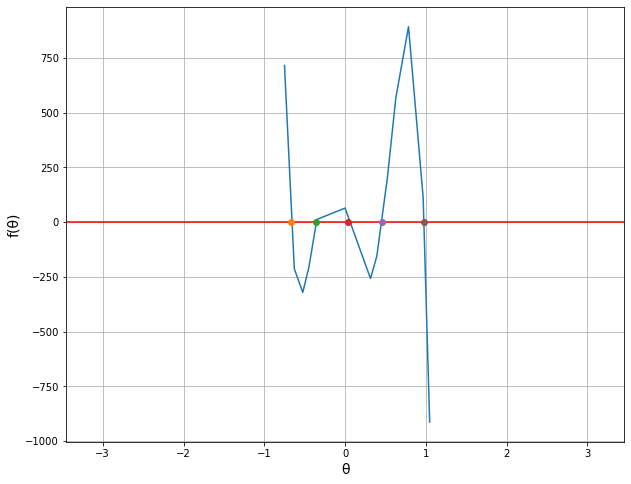

In [ ]:

d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df5_close=pd.DataFrame(data=d)
listloop=[ -math.pi/4.1887,-math.pi/5, -math.pi/6,-math.pi/7,-math.pi/8,-math.pi/9, 0, math.pi/9.99,math.pi/8, math.pi/6, math.pi/5, math.pi/4,math.pi/3.25, math.pi/3 ]

for i in range(len(listloop)):
    result = stewartFunction5(listloop[i])
    df5_close.loc[i]=[listloop[i],result[1],result[2],result[0]]


x=drawFig(df5_close)
x.plot(pose_1,0,'o')
x.plot(pose_2,0,'o')
x.plot(pose_3,0,'o')
x.plot(pose_4,0,'o')
x.plot(pose_5,0,'o')
plt.show()

<font size="+0.5">To confirm the presence of only 6 roots, we now create a zoom graph of the section excluded in the previous zoom.<font/>

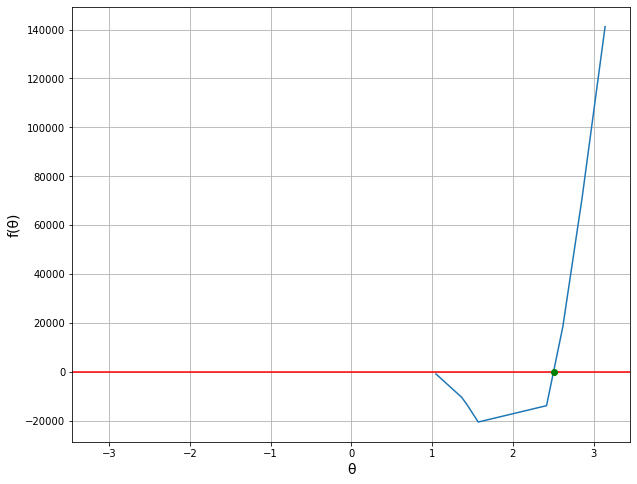

In [ ]:
d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df5_close=pd.DataFrame(data=d)
listloop=[ math.pi/3, math.pi/2.3,math.pi/2.2,math.pi/2,math.pi/1.3,math.pi/1.2,math.pi/1.1,math.pi ]
for i in range(len(listloop)):
    result = stewartFunction5(listloop[i])
    df5_close.loc[i]=[listloop[i],result[1],result[2],result[0]]



x=drawFig(df5_close)
x.plot(pose_6,0,'o',color='g')
plt.show()

theta =  -0.673157486371674
x=  -4.314759599568257 y=  2.5264302084034647


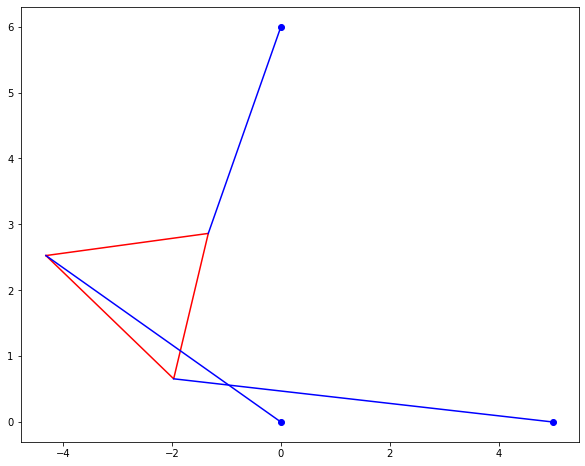

In [ ]:
print("theta = ",pose_1)
drawPoses(stewartFunction5,pose_1)

theta =  -0.36
x=  -4.798100300322546 y=  1.400867576376278


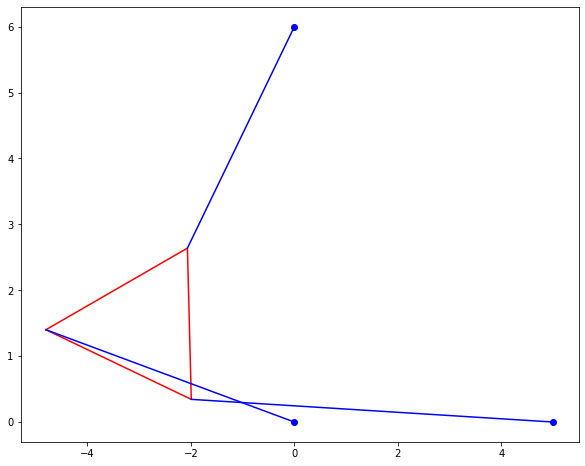

In [ ]:
print("theta = ",pose_2)
drawPoses(stewartFunction5,pose_2)

theta =  0.03776676057591431
x=  -4.949024616818953 y=  0.7121483989450557


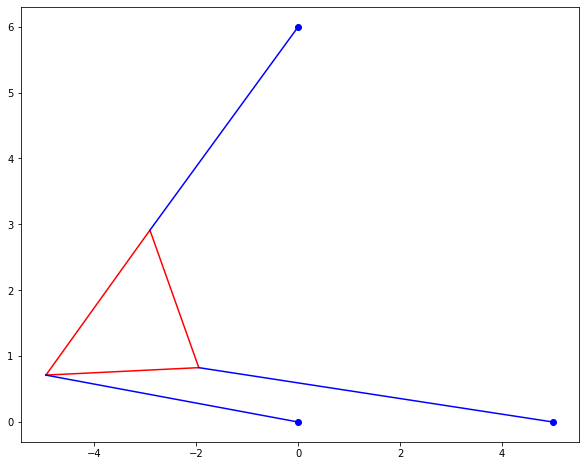

In [ ]:
print("theta = ",pose_3)
drawPoses(stewartFunction5,pose_3)

theta =  0.4588781810489895
x=  -0.8198001690662363 y=  4.932334911864661


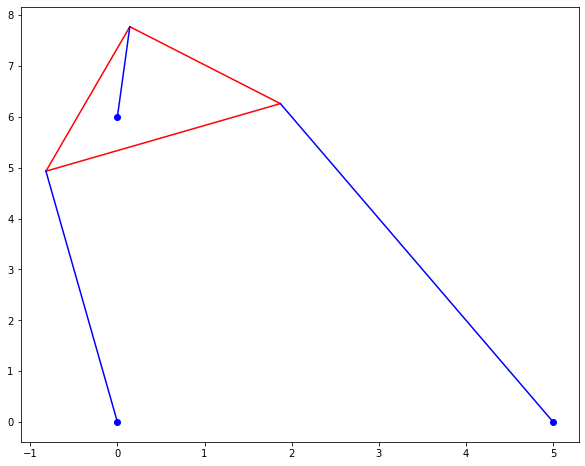

In [ ]:
print("theta = ",pose_4)
drawPoses(stewartFunction5,pose_4)

theta =  0.9776728950003626
x=  2.3035540991463486 y=  4.4377515153854725


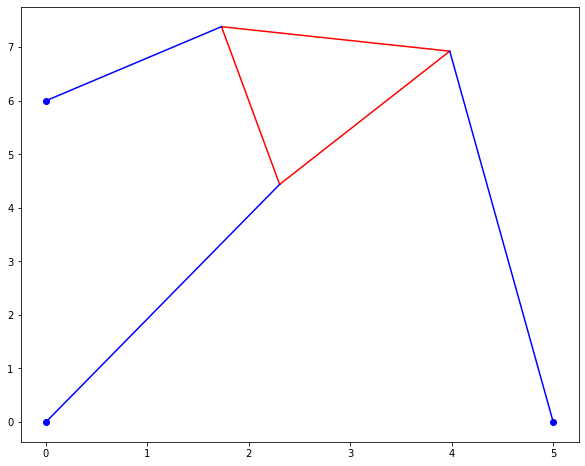

In [ ]:
print("theta = ",pose_5)
drawPoses(stewartFunction5,pose_5)

theta =  2.513852799350385
x=  3.21569603615108 y=  3.828746400988479


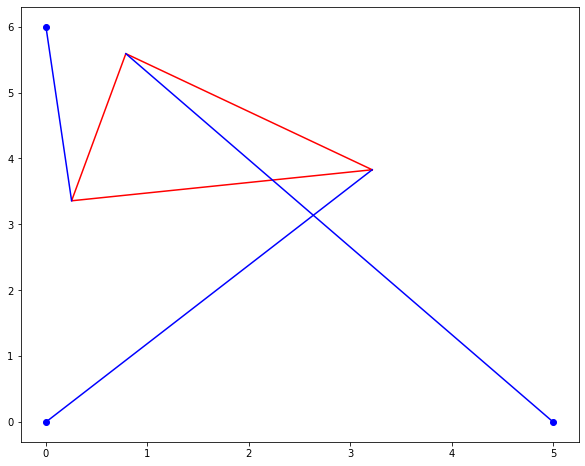

In [ ]:
print("theta = ",pose_6)
drawPoses(stewartFunction5,pose_6)

### Part 6

<font size="+0.5">For the strut length p2, for which there are only two poses, the value of p2 should be within the range of intervals (3.7110000000000003, 4.864) and (7.849, 9.262). More detail explanation of these intervals is in Part 5. So, let's take strut length p2 = 4.<font/>

In [ ]:
def stewartFunction6(theta):
    L1=3
    L2=3*math.sqrt(2)
    L3=L1
    
    p1=5
    p2=4;
    p3=3
    gamma= math.pi /4
    x1=5
    x2=0
    y2=6
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
    
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    if D!=0:
        x=N1/D
        y=N2/D
    else: 
        return "D=0,Hence x,y couldn`t be found"
    fTheta=N1**2 + N2**2 - (p1**2)*(D**2)
    return fTheta, x, y


In [ ]:
p2 = 4
d = {'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df6=pd.DataFrame(data=d)

listloop=[ -math.pi, -math.pi/2,  -math.pi/3, -math.pi/4, -math.pi/5, -math.pi/6, -math.pi/8, 0, math.pi/8, math.pi/6, math.pi/5, math.pi/4, math.pi/3, math.pi /2, math.pi/1.7666,math.pi]

for i in range(len(listloop)):
    result = stewartFunction6(listloop[i])
    df6.loc[i]=[listloop[i],result[1],result[2],result[0]]
print(df6)

           θ          x          y           f(θ)
0  -3.141593   4.562500   4.368056  308890.000000
1  -1.570796   0.638889   6.101852  147442.000000
2  -1.047198  -0.244486   5.717962   39071.110616
3  -0.785398  -0.338223   5.594174   17695.008691
4  -0.628319  -0.223604   5.637017   12178.086962
5  -0.523599  -0.050433   5.753836   10417.629320
6  -0.392699   0.311930   6.050879    9514.779551
7   0.000000   3.250000   8.916667    9370.000000
8   0.392699  10.491339  13.707316    8387.970884
9   0.523599  10.886751  11.759685    7912.364047
10  0.628319   9.848568   9.059498    7487.638215
11  0.785398   7.786283   5.430964    6666.420150
12  1.047198   5.644486   2.215371    4256.889384
13  1.570796   4.812500   0.854167   -2558.000000
14  1.778327   4.899612   1.000129      25.009319
15  3.141593   4.562500   4.368056  308890.000000


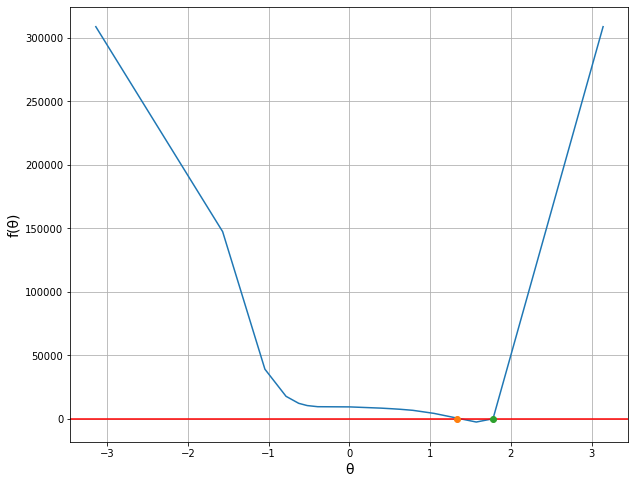

In [ ]:
x=drawFig(df6)
pose_1 = bisectionMethod(stewartFunction6,1, 1.5,tol,nmax=100)[1]
pose_2 = bisectionMethod(stewartFunction6,1.5, 2,tol,nmax=100)[1]
x.plot(pose_1,0,'o')
x.plot(pose_2,0,'o')
plt.show()

In [ ]:
pose_1 = bisectionMethod(stewartFunction6,1, 1.5,tol,nmax=100)[1]
pose_2 = bisectionMethod(stewartFunction6,1.5, 2,tol,nmax=100)[1]

theta = 1.331642203342784
x=  4.890658973005098 y=  1.0399301946595856


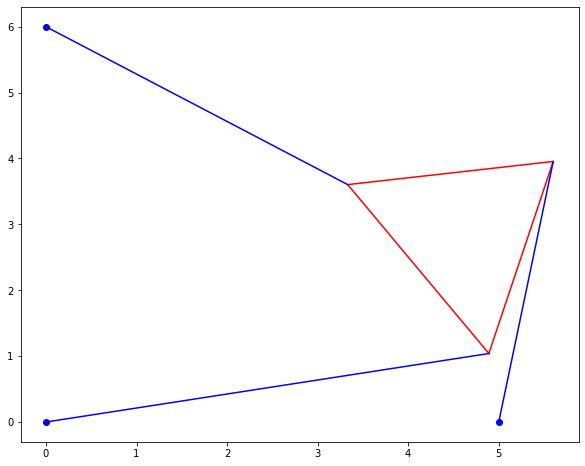

In [ ]:
print("theta =",pose_1)
drawPoses(stewartFunction6,pose_1)

theta = 1.7775135743998542
x=  4.899151197793508 y=  0.999158416447784


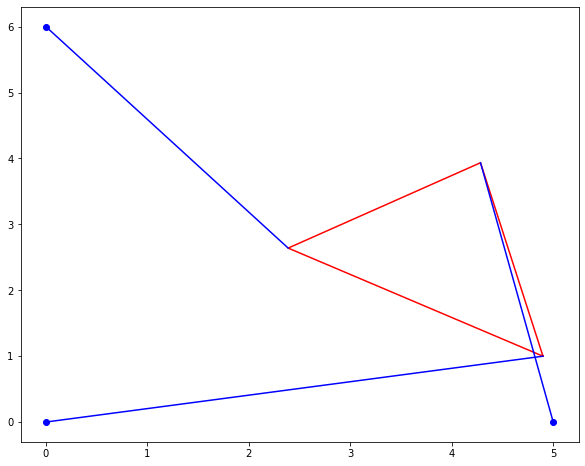

In [ ]:
print("theta =",pose_2)
drawPoses(stewartFunction6,pose_2)

### Part 7
<font size="+0.5"> Here we will calculate the different intervals in which p2 has 0, 2, 4, and 6 poses respectively. The other initial conditions will be the same as part 4. <font/>

In [ ]:
def stewartFunction7(theta, p2):
    L1=3
    L2=3*math.sqrt(2)
    L3=L1
    
    p1=5
    p2=p2;
    p3=3
    gamma= math.pi /4
    x1=5
    x2=0
    y2=6
    
    A2=L3*math.cos(theta)-x1
    B2=L3*math.sin(theta)
    A3=L2*math.cos(theta+gamma)-x2
    B3=L2*math.sin(theta+gamma)-y2
    
    N1=B3*(p2**2 - p1**2 - A2**2 -B2**2) - B2*(p3**2 - p1**2 - A3**2 - B3**2)
    N2=(-1)*(A3)*(p2**2 - p1**2 - A2**2 - B2**2) + A2*(p3**2 - p1**2 - A3**2 - B3**2)
    D=2*(A2*B3-B2*A3)
    if D!=0:
        x=N1/D
        y=N2/D
    else: 
        return "D=0,Hence x,y couldn`t be found"
    fTheta=N1**2 + N2**2 - (p1**2)*(D**2)
    return fTheta, x, y


<font size="+0.5">Here we have taken the p2 values from 1 to 10 with difference of 0.01 and theta list from -3.14 to 3.14 with difference of 3.14*0.01. Then we have get the value of p2 with respect to the poses.<font/>

In [ ]:
d = {'p2':[],'θ': [], 'x':[], 'y':[],'f(θ)':[]}
df6=pd.DataFrame(data=d)

lists=np.arange(-math.pi,math.pi,math.pi*0.01)
lists = list(lists)
root_list = []
p2List = np.arange(0,10,0.01)
def poseInterval():
    for i in p2List:
        count=0
        for j in range(len(lists)+1):
            result = stewartFunction7(lists[j],i)
            df6.loc[i]=[i,lists[j],result[1],result[2],result[0]]
            if(lists[j] == lists[-1]):
                break
            if(stewartFunction7(lists[j],i)[0] * stewartFunction7(lists[j+1],i)[0] < 0):
                count=count+1
        root_list.append(count)
    return root_list


In [ ]:
intervals = poseInterval()

In [ ]:
def drawIntervals(x,y):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.title('Number of roots for f(θ) versus the value of p2.',fontsize=14)
    plt.ylabel('number of roots',fontsize=14)
    plt.xlabel('p2',fontsize=14)
    plt.plot(x,y)

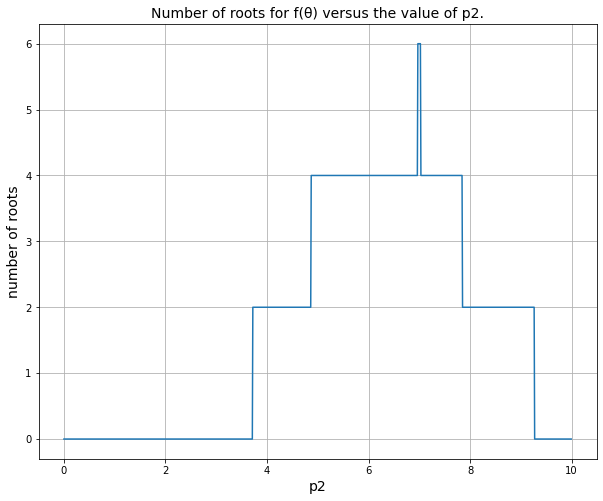

In [ ]:
drawIntervals(np.arange(0,10,0.01),intervals)

In [ ]:
twoPoseIndex = []
fourPoseIndex = []
sixPoseIndex = []
zerPoseIndex = []
count = 0;
for i,p2 in enumerate(intervals):
    if(p2 == 0):
        zerPoseIndex.append(i)
        count=0
    elif(p2 == 2):
        twoPoseIndex.append(i)
        count=2
    elif(p2 == 4):
        fourPoseIndex.append(i)
        count =4
    else:
        sixPoseIndex.append(i)
        count =  6

zeroPoseInterval1 = (0,p2List[twoPoseIndex[0]])
twoPoseInterval1 = (p2List[twoPoseIndex[0]],p2List[fourPoseIndex[0]])
FourPoseInterval1 = (p2List[fourPoseIndex[0]],p2List[sixPoseIndex[0]])
sixPoseInterval1 = (p2List[sixPoseIndex[0]],p2List[sixPoseIndex[-1]])
FourPoseInterval2 = (p2List[sixPoseIndex[-1]],p2List[fourPoseIndex[-1]])
twoPoseInterval2 = (p2List[fourPoseIndex[-1]],p2List[twoPoseIndex[-1]])
zeroPoseInterval2 = (p2List[twoPoseIndex[-1]],p2List[zerPoseIndex[-1]])

IntervalsOrder = [zeroPoseInterval1,twoPoseInterval1,FourPoseInterval1,sixPoseInterval1,FourPoseInterval2, twoPoseInterval2,zeroPoseInterval2]
poses = [0,2,4,6,4,2,0]
d = {'poses': [], 'intervals':[], }
interval = pd.DataFrame(data=d)
interval['poses']= poses
IntervalsOrder = list(np.around(np.array(IntervalsOrder), 2))
interval['intervals'] = IntervalsOrder
interval

,poses,intervals
0,0,"[0.0, 3.72]"
1,2,"[3.72, 4.87]"
2,4,"[4.87, 6.97]"
3,6,"[6.97, 7.02]"
4,4,"[7.02, 7.84]"
5,2,"[7.84, 9.26]"
6,0,"[9.26, 9.99]"


### References and Helpful Links

Stewart Platform Kinematics
<ul>
<li>Numerical Analysis by Timothy Sauer (3rd edition, pages 70 – 73)</li>
<li>https://www.researchgate.net/publication/220103568_Kinematic_and_dynamic_analysis_of_Stewart_platform-+based_machine_tool_structures</li>
<li>https://www.sciencedirect.com/science/article/abs/pii/S0094114X01000349</li> 
</ul>

Bisection Solver
<ul>
<li>https://www.youtube.com/watch?v=mzQFGOvH-mk</li>
<li>https://protonstalk.com/polynomials/bisection-method/</li>
<li>https://byjus.com/maths/bisection-method/#:~:text=The%20bisection%20method%20is%20an,found%2C%20which%20is%20extremely%20small.</li>
<li>https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.03-Bisection-Method.html </li> 
</ul>

Newton Solver
<ul>
<li>https://www.youtube.com/watch?v=99ABkygm2Xg</li>
<li>https://calcworkshop.com/derivatives/newtons-method/</li>
<li>https://towardsdatascience.com/develop-your-own-newton-raphson-algorithm-in-python-a20a5b68c7dd</li>
<li>https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html</li>
</ul>

Plotting in Python
<ul>
<li>https://matplotlib.org/stable/tutorials/introductory/pyplot.html</li>
<li>https://realpython.com/python-matplotlib-guide/</li>
<li>https://www.youtube.com/watch?v=qErBw-R2Ybk</li>
<li>https://www.youtube.com/watch?v=UO98lJQ3QGI</li>
</ul>
 